# Data preprocessing

Let's start first by loading the data

Let's import the libraries needed for the next steps

In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [2]:
train_dir = 'datasets/asl_alphabet/train'
val_dir = 'datasets/asl_alphabet/val'
test_dir  = 'datasets/asl_alphabet/test'

In [103]:
batch_size = 128
target_size = (32, 32)  # dataset pic = 200x200

# Define the transformations
train_transforms = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize(target_size),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=45),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

val_test_transforms = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize(target_size),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load the datasets
train_dataset = datasets.ImageFolder(train_dir, transform=train_transforms)
val_dataset = datasets.ImageFolder(val_dir, transform=val_test_transforms)
test_dataset = datasets.ImageFolder(test_dir, transform=val_test_transforms)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


Let's check the number of classes and classes we have

In [104]:
labels = train_dataset.classes
print("Size: ", len(labels))
print(labels)

Size:  29
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


Let's check that the images have loaded in correctly by displaying some examples

In [138]:
def imshow(ax, img, label):
    img = img / 2 + 0.5 
    np_img = img.numpy()
    ax.imshow(np_img[0])
    ax.set_title(f"Label: {train_dataset.classes[label]}")
    ax.axis('off')

In [139]:
def show_samples(loader):
    data_iter = iter(loader)
    images, labels = next(data_iter)
    fig, axes = plt.subplots(1, 6, figsize=(12, 6)) 
    for i in range(6):
        ax = axes[i]
        imshow(ax, images[i], labels[i])
        
    plt.show()

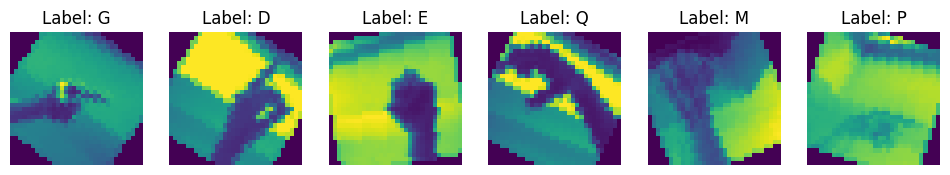

In [140]:
show_samples(train_loader)

Let's save the preprocessed images in a new directory. It will save inside datasets/preprocessed

In [141]:
output_dir = "../dataset/preprocessed/asl_alphabet"
splits = ['train', 'val', 'test']

# This creates directories for preprocessed train, val, and test
for split in splits:
    os.makedirs(os.path.join(output_dir, split), exist_ok=True)
    for class_name in train_dataset.classes:
        os.makedirs(os.path.join(output_dir, split, class_name), exist_ok=True)

In [136]:
from tqdm import tqdm

def save_preprocessed_images(loader, dataset, output_split):
    for batch_idx, (image_batch, labels_batch) in tqdm(enumerate(loader), total=len(loader)):
        images_to_save = []  # List to hold images to save
        class_names = []  # List to hold class names for saving
        
        for i in range(image_batch.size(0)):  # Iterate through the batch
            # Get the class label
            label = labels_batch[i]
            class_name = dataset.classes[label.item()]  # Get the class name
            
            # Convert the tensor back to an image
            image = image_batch[i].squeeze(0)  # Remove the channel dimension (1, 32, 32) -> (32, 32)
            image = image / 2 + 0.5  # Unnormalize
            image = transforms.ToPILImage()(image)  # Convert to PIL image
            
            images_to_save.append(image)  # Collect image for saving
            class_names.append(class_name)  # Collect corresponding class name

        # Save all images in this batch
        for idx, image in enumerate(images_to_save):
            # Create the directory path for the current class
            class_path = os.path.join(output_dir, output_split, class_names[idx])
            os.makedirs(class_path, exist_ok=True)  # Ensure the class directory exists
            
            # Create the image save path with the format ClassName.jpg
            image_save_path = os.path.join(class_path, f"{class_names[idx]}{batch_idx * image_batch.size(0) + idx}.jpg")
            image.save(image_save_path, format='JPEG')  # Save as JPG

In [137]:
save_preprocessed_images(train_loader, train_dataset, 'train')
save_preprocessed_images(val_loader, val_dataset, 'val')
save_preprocessed_images(test_loader, test_dataset, 'test')

100%|██████████| 68/68 [00:22<00:00,  2.98it/s]
